In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Provide reasons why columns are dropped:
  

*   The reasons was mainly due high missing values, and irrelevant information.
*   Plus i thought it was not easier but would make analysis more difficult since it was ahuge data set and i had only few hours.
*   SO, i considered only the imp  columns wich would make a better accurate predictions.
*   For, this part i have selected more columns comapred to the previous section.

Importing the Data Set.

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/VD/archive/application_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


*   IN the present data set we have unwanted columns like the FLAG_DOCUMENT_ which are used to check if the user has given particulard documenst or so.
*   So I have selected the important columns that represent the imp data of the indiviual i.e. the finanacial status, employment, personal info, etc. which will help in contibuting in accurate desicion making.

Below is the list of columns that i have selcted. which represent the imp data contents like the incoe, employment, etc.


In [68]:
columns_to_keep = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                    'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OCCUPATION_TYPE',
                    'CNT_FAM_MEMBERS','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE']

In [69]:
df_new = data[columns_to_keep]
df_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-9461,-637,-3648.0,-2120,Laborers,1.0,2,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-16765,-1188,-1186.0,-291,Core staff,2.0,1,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-19046,-225,-4260.0,-2531,Laborers,1.0,2,MONDAY,9,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,THURSDAY,11,Religion


In [70]:
df_new.shape

(307511, 25)

## Data Cleaning

In [71]:
#Checking for Null values in the dataset
null_values = df_new.isnull().sum()

# Display the null values
print("Null values in each column:")
print(null_values)

Null values in each column:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
dtype: int64


Replacing the NaN values from the Columns NAME_TYPE and OCCUPATION_TYPE with UNKNOWN

In [72]:
df_new['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)
df_new['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

<ipython-input-72-bf1e5d165c25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)
<ipython-input-72-bf1e5d165c25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


In [73]:
#Checking for Null values in the dataset
null_values = df_new.isnull().sum()

# Display the null values
print("Null values in each column:")
print(null_values)

Null values in each column:
SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                   12
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
ORGANIZATION_TYPE              0
dtype: int64


Since there are only 14 null cell represnt in the data set we will delete this rows.

In [74]:
# Dropping the NUll values in the Data
df_new.dropna(subset=['CNT_FAM_MEMBERS'], inplace=True)
df_new.dropna(subset=['AMT_ANNUITY'], inplace=True)

<ipython-input-74-3792b0e0ee98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(subset=['CNT_FAM_MEMBERS'], inplace=True)
<ipython-input-74-3792b0e0ee98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(subset=['AMT_ANNUITY'], inplace=True)


In [75]:
#Checking for Null values in the dataset
null_values = df_new.isnull().sum()

# Display the null values
print("Null values in each column:")
print(null_values)

Null values in each column:
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
ORGANIZATION_TYPE             0
dtype: int64


In [76]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307497 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307497 non-null  int64  
 1   TARGET                      307497 non-null  int64  
 2   NAME_CONTRACT_TYPE          307497 non-null  object 
 3   CODE_GENDER                 307497 non-null  object 
 4   FLAG_OWN_CAR                307497 non-null  object 
 5   FLAG_OWN_REALTY             307497 non-null  object 
 6   CNT_CHILDREN                307497 non-null  int64  
 7   AMT_INCOME_TOTAL            307497 non-null  float64
 8   AMT_CREDIT                  307497 non-null  float64
 9   AMT_ANNUITY                 307497 non-null  float64
 10  NAME_TYPE_SUITE             307497 non-null  object 
 11  NAME_INCOME_TYPE            307497 non-null  object 
 12  NAME_EDUCATION_TYPE         307497 non-null  object 
 13  NAME_FAMILY_ST

Printing the unique values present in the code_gender


In [77]:
distinct_values = df_new['CODE_GENDER'].unique()
print("Distinct values in CODE_GENDER column:", distinct_values)

Distinct values in CODE_GENDER column: ['M' 'F' 'XNA']


We can see that there is some unknow variable present in the columns "XNA".

In [78]:
# Deleting rows where the Code_gender is XNA
df_new = df_new.drop(df_new[df_new['CODE_GENDER'] == 'XNA'].index)

In [79]:
distinct_values = df_new['CODE_GENDER'].unique()
print("Distinct values in CODE_GENDER column:", distinct_values)

Distinct values in CODE_GENDER column: ['M' 'F']


In [80]:
df_new.shape

(307493, 25)

## 3. Analysis

<Axes: xlabel='TARGET', ylabel='count'>

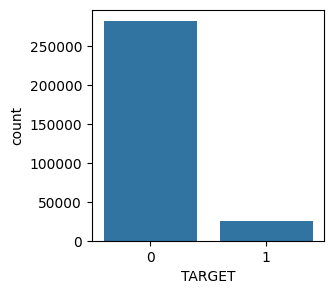

In [81]:
plt.figure(figsize=(3,3))
sns.countplot(data=df_new , x='TARGET')

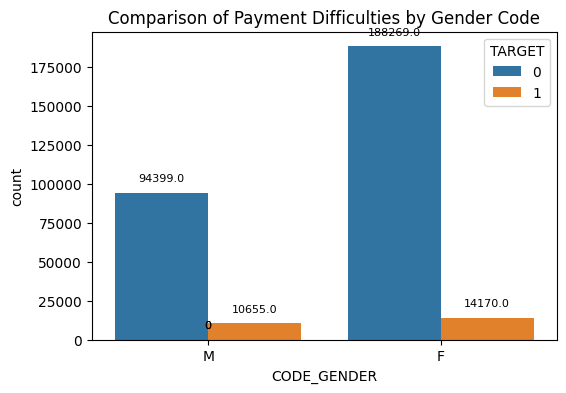

In [82]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='CODE_GENDER', hue='TARGET', data=df_new)

# Adding count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Comparison of Payment Difficulties by Gender Code')
plt.show()

In the above Graph we can see that the More MALEs are facing issues for repayment compare to the overall females who have quite less to their population.

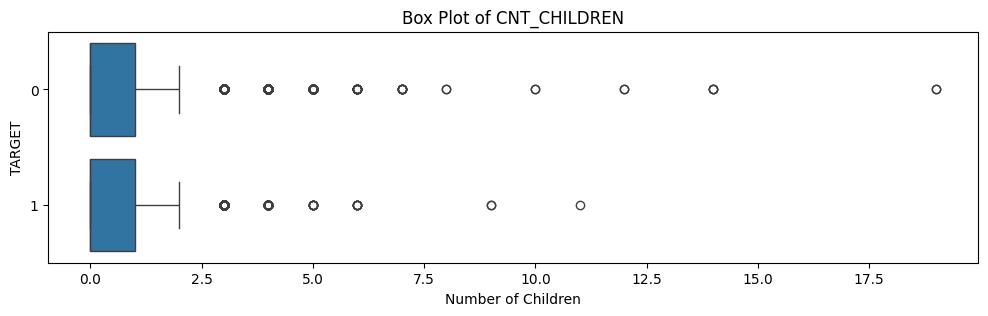

In [83]:
# Creating a box plot for 'CNT_CHILDREN'
plt.figure(figsize=(12, 3))
sns.boxplot(x=df_new['CNT_CHILDREN'], y=df_new['TARGET'], orient = 'h')
plt.xlabel('Number of Children')
plt.title('Box Plot of CNT_CHILDREN')
plt.show()

In [84]:
# Identify outliers
outliers = df_new[df_new['CNT_CHILDREN'] > 4]
print(outliers.shape)

(126, 25)


*   We can see that there are data poits representing values till 5 and above which seems to be error in the dataset.
*   So lets drop the columns which have children more than 4.

In [85]:
df = df_new[df_new['CNT_CHILDREN'] < 4]
print(df.shape)

(306938, 25)


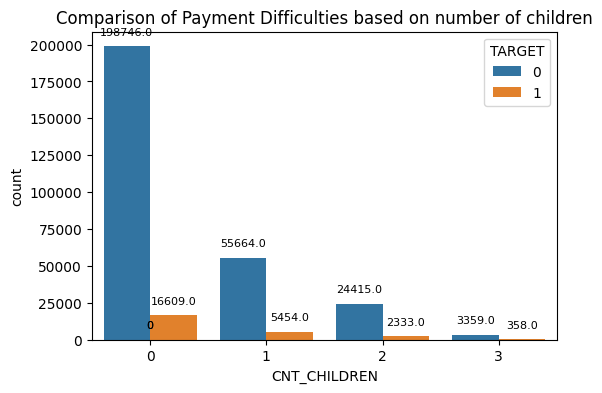

In [86]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=df)

# Adding count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Comparison of Payment Difficulties based on number of children')
plt.show()

Based on the aboe graph we can consider the following ratio based on target i.e
 0:1. Who faced more difficulty in repaying based on children count.
*   0 children =  1:11
*   1 children =  1:10
*   2 children =  1:10
*   3 children =  1:9


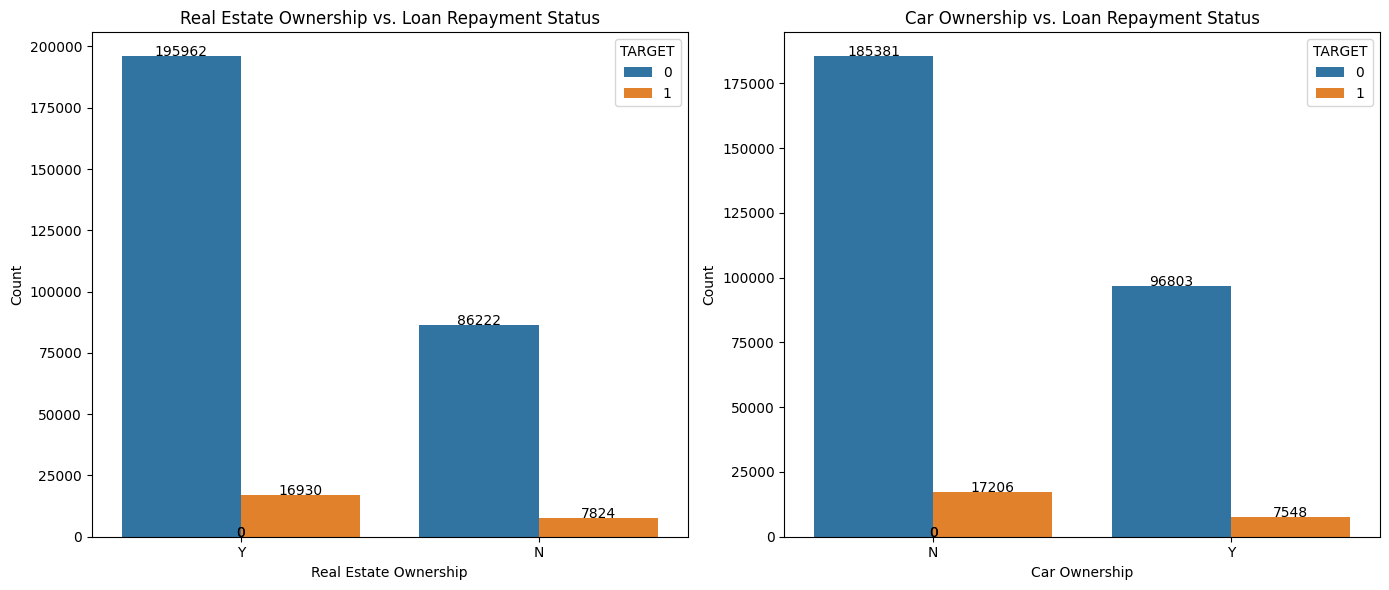

In [87]:
plt.figure(figsize=(14, 6))

# Plot for Real Estate Ownership vs. Loan Repayment Status
plt.subplot(1, 2, 1)
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=df)

# Add count annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', color='black', size=10)

plt.title('Real Estate Ownership vs. Loan Repayment Status')
plt.xlabel('Real Estate Ownership')
plt.ylabel('Count')

# Plot for Car Ownership vs. Loan Repayment Status
plt.subplot(1, 2, 2)
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=df)

# Add count annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', color='black', size=10)

plt.title('Car Ownership vs. Loan Repayment Status')
plt.xlabel('Car Ownership')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

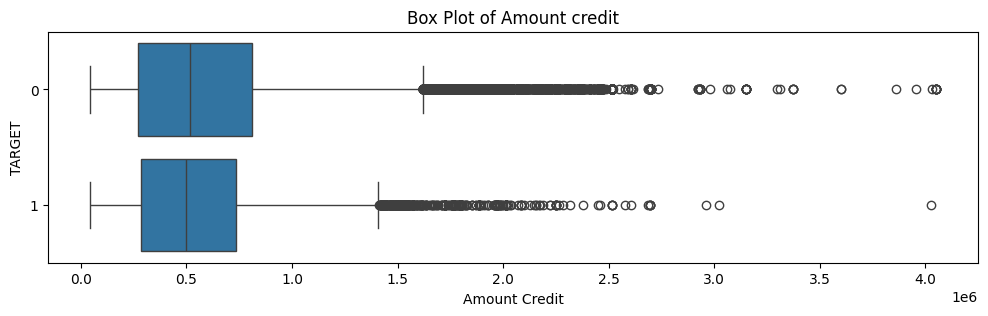

In [88]:
# Creating a box plot for 'Amount of credit'
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['AMT_CREDIT'], y=df['TARGET'], orient = 'h')
plt.xlabel('Amount Credit')
plt.title('Box Plot of Amount credit')
plt.show()

In [89]:
# Identify outliers
outliers_1 = df[(df['AMT_CREDIT'] > 2000000) & (df['TARGET']==1)]
outliers_0 = df[(df['AMT_CREDIT'] > 2000000) & (df['TARGET']==0)]
print('For target 1 ',outliers_1.shape)
print('For target 0 ',outliers_0.shape)

For target 1  (66, 25)
For target 0  (1958, 25)


We can see that from the box plot quite few individual are unable to pay the loan who have taken more than 2 lakhs

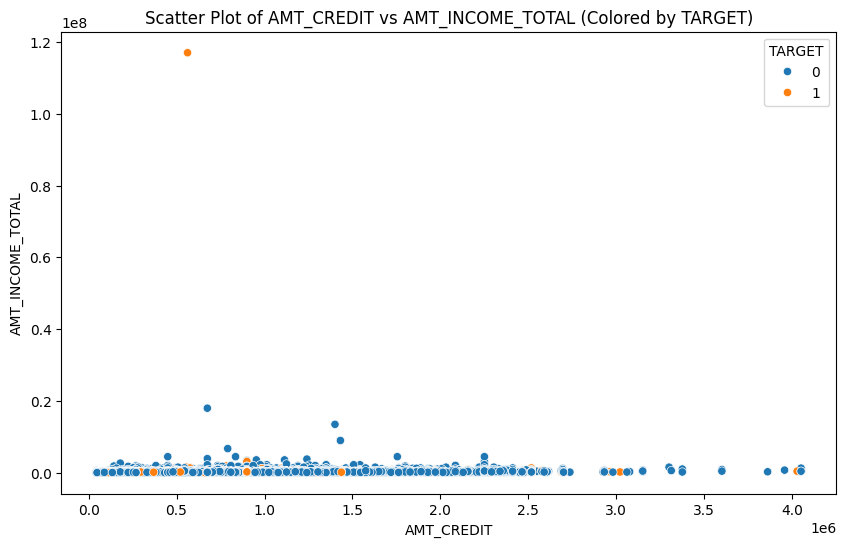

In [90]:
# Scatter plot for AMT_CREDIT and AMT_INCOME_TOTAL
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', hue='TARGET', data=df)
plt.title('Scatter Plot of AMT_CREDIT vs AMT_INCOME_TOTAL (Colored by TARGET)')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

We can clearly see that people have taken loan quite huge compare to the Toatal income amount.

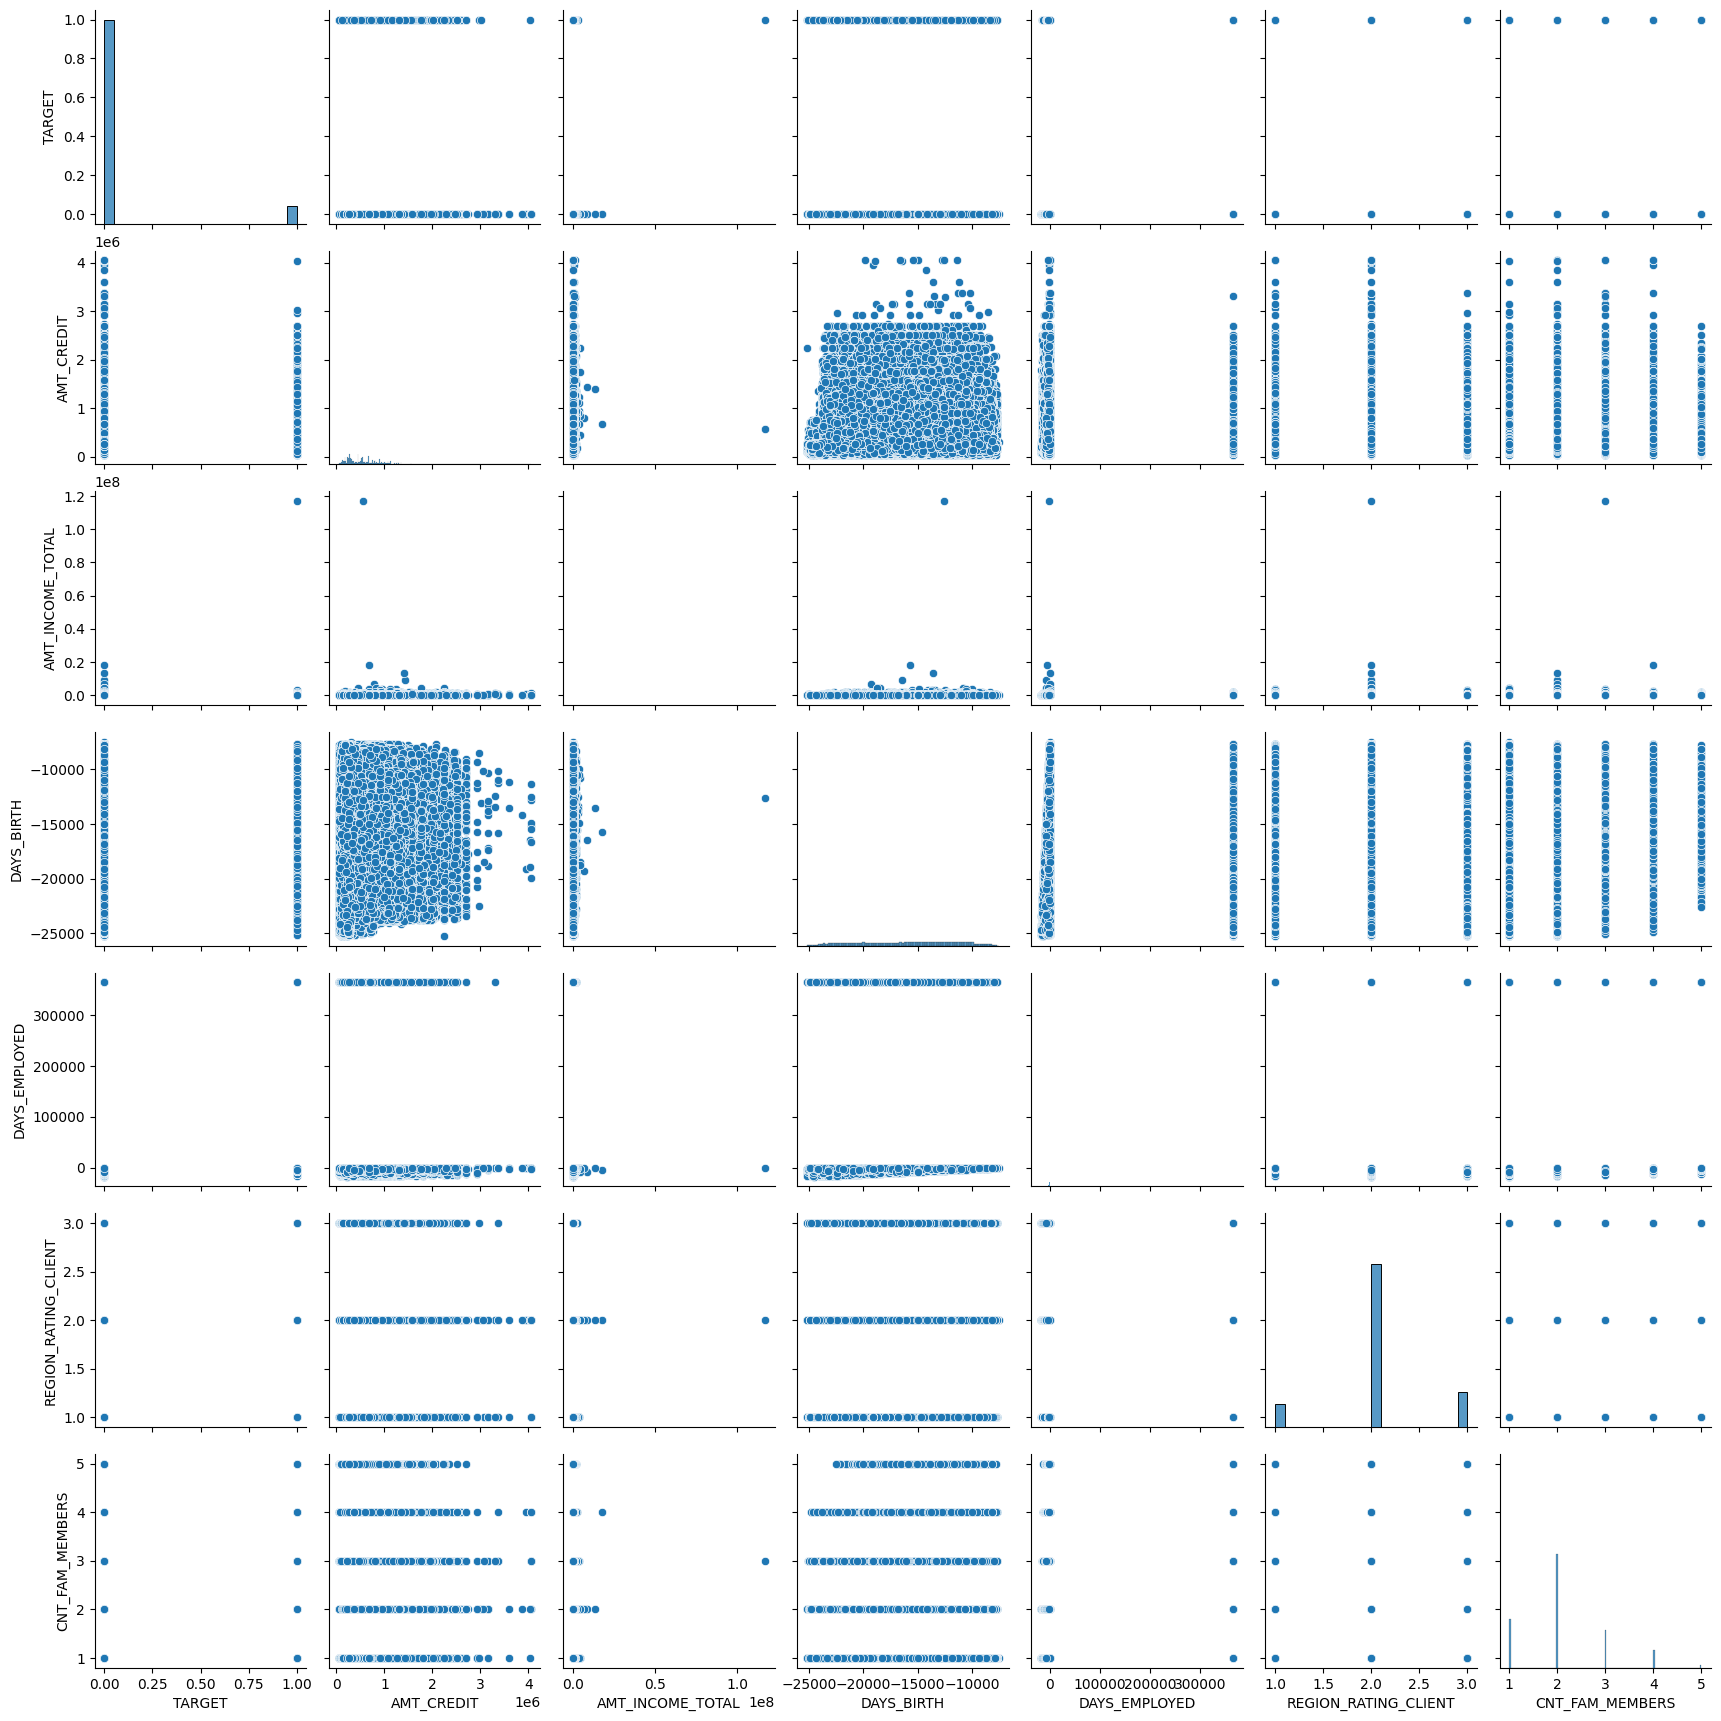

In [52]:
sns.pairplot(df[['TARGET', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'CNT_FAM_MEMBERS']])
plt.show()

##Merging previous_data and Application_data

In [60]:
prev_df = pd.read_csv('/content/gdrive/MyDrive/VD/archive/previous_application.csv')
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
print(prev_df.shape)

(1670214, 37)


Lets rename the previous dataset column names

In [62]:
prev_df.columns = ['prev_' + col if col not in ['SK_ID_PREV', 'SK_ID_CURR'] else col for col in prev_df.columns]

In [63]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,prev_NAME_CONTRACT_TYPE,prev_AMT_ANNUITY,prev_AMT_APPLICATION,prev_AMT_CREDIT,prev_AMT_DOWN_PAYMENT,prev_AMT_GOODS_PRICE,prev_WEEKDAY_APPR_PROCESS_START,prev_HOUR_APPR_PROCESS_START,...,prev_NAME_SELLER_INDUSTRY,prev_CNT_PAYMENT,prev_NAME_YIELD_GROUP,prev_PRODUCT_COMBINATION,prev_DAYS_FIRST_DRAWING,prev_DAYS_FIRST_DUE,prev_DAYS_LAST_DUE_1ST_VERSION,prev_DAYS_LAST_DUE,prev_DAYS_TERMINATION,prev_NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Merging the data based on the

In [91]:
# Merging the datasets on the 'SK_ID_CURR' column
merged_df = pd.merge(df, prev_df, on='SK_ID_CURR', how='inner')

# Display the merged dataframe
print(merged_df.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100003       0         Cash loans           F            N   
3      100003       0         Cash loans           F            N   
4      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               N             0          270000.0   1293502.5      35698.5   
3               N             0          270000.0   1293502.5      35698.5   
4               Y             0           67500.0    135000.0       6750.0   

   ... prev_NAME_SELLER_INDUSTRY prev_CNT_PAYMENT prev_NAME_YIELD_GROUP  \
0  ...           Auto technology         

In [93]:
merged_df.shape

(1411041, 61)

In [95]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411041 entries, 0 to 1411040
Data columns (total 61 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   SK_ID_CURR                        1411041 non-null  int64  
 1   TARGET                            1411041 non-null  int64  
 2   NAME_CONTRACT_TYPE                1411041 non-null  object 
 3   CODE_GENDER                       1411041 non-null  object 
 4   FLAG_OWN_CAR                      1411041 non-null  object 
 5   FLAG_OWN_REALTY                   1411041 non-null  object 
 6   CNT_CHILDREN                      1411041 non-null  int64  
 7   AMT_INCOME_TOTAL                  1411041 non-null  float64
 8   AMT_CREDIT                        1411041 non-null  float64
 9   AMT_ANNUITY                       1411041 non-null  float64
 10  NAME_TYPE_SUITE                   1411041 non-null  object 
 11  NAME_INCOME_TYPE                  141

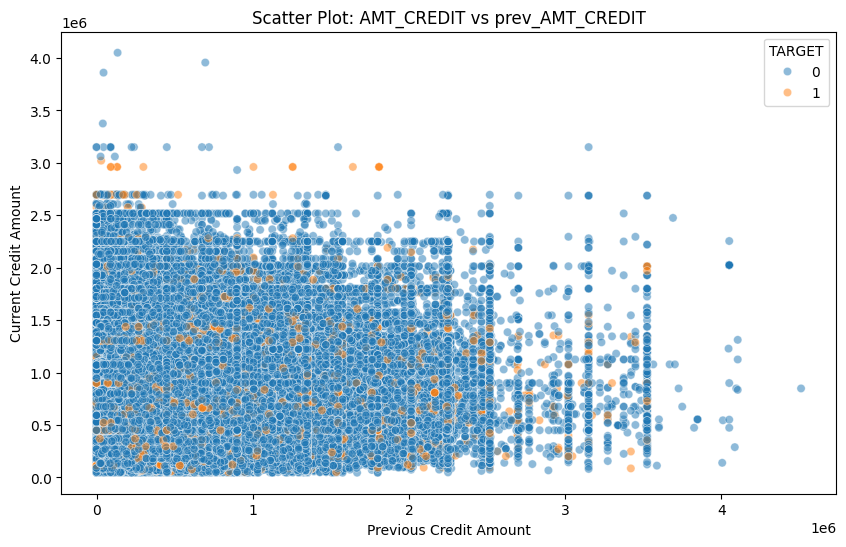

In [97]:
# Scatter plot with color based on 'TARGET' variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prev_AMT_CREDIT', y='AMT_CREDIT', hue='TARGET', data=merged_df, alpha=0.5)
plt.title('Scatter Plot: AMT_CREDIT vs prev_AMT_CREDIT')
plt.xlabel('Previous Credit Amount')
plt.ylabel('Current Credit Amount')
plt.legend(title='TARGET')
plt.show()

<Figure size 1000x600 with 0 Axes>

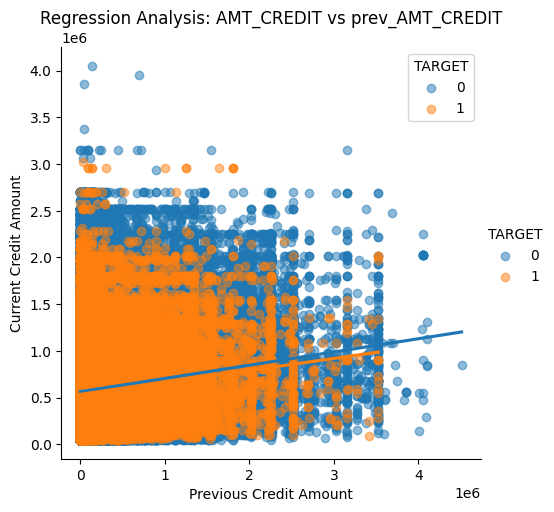

In [98]:
# Regression plot with color based on 'TARGET' variable
plt.figure(figsize=(10, 6))
sns.lmplot(x='prev_AMT_CREDIT', y='AMT_CREDIT', hue='TARGET', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Regression Analysis: AMT_CREDIT vs prev_AMT_CREDIT')
plt.xlabel('Previous Credit Amount')
plt.ylabel('Current Credit Amount')
plt.legend(title='TARGET')
plt.show()

*   We can see that the tightness of the cluster of points around the regression line indicates a strong relationship of both columns.
*   